In [12]:
import pandas as pd

In [13]:
url = 'http://www.seoul.go.kr/coronaV/coronaStatus.do'
url

'http://www.seoul.go.kr/coronaV/coronaStatus.do'

In [14]:
table = pd.read_html(url)
len(table)

4

In [15]:
table[0]

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구
0,126,108,224,221,181,307,292,457,196,312,472,358,257
1,+1,+2,+4,+1,+3,+3,+5,+4,+8,+4,+13,+8,+7
2,마포구,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
3,286,304,596,272,123,294,385,542,462,504,604,273,655
4,+5,+11,+15,+3,+6,+5,+3,+7,+11,+12,+5,+2,+11


In [16]:
table[3]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


In [17]:
import requests

In [18]:
url = "https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw=1"
url

'https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw=1'

In [19]:
url = url + "&order%5B0%5D%5Bdir%5D=desc&start=100&length=1000"
url

'https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw=1&order%5B0%5D%5Bdir%5D=desc&start=100&length=1000'

In [20]:
response = requests.get(url)
data_json = response.json()

In [21]:
records_total = data_json['recordsTotal']
records_total

8811

In [22]:
end_page = round(records_total / 100) + 1
end_page

89

In [23]:
data = data_json["data"]

In [24]:
pd.DataFrame(data).head()

,0,1,2,3,4,5,6
0,<p class='corona19_no'>8811</p>,33918,11.29.,노원구,-,감염경로 조사중,<b class=''></b>
1,<p class='corona19_no'>8810</p>,34016,11.29.,타시도,-,감염경로 조사중,<b class=''></b>
2,<p class='corona19_no'>8809</p>,33902,11.29.,관악구,-,감염경로 조사중,<b class=''></b>
3,<p class='corona19_no'>8808</p>,34193,11.29.,관악구,-,기타 확진자 접촉,<b class=''></b>
4,<p class='corona19_no'>8807</p>,34180,11.29.,강동구,-,감염경로 조사중,<b class=''></b>


In [25]:
def get_seoul_covid19_100(page_no):
    """
    page_no : 입력값으로 페이지 번호를 입력하면 해당 번호의 데이터를 가져옴
    start_no : 입력받은 page_no로 
    """
    start_no = (page_no - 1) * 100
    url = f"https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw={page_no}"
    url = f"{url}&order%5B0%5D%5Bdir%5D=desc&start={start_no}&length=100"
    response = requests.get(url)
    data_json = response.json()
    return data_json

In [26]:
get_seoul_covid19_100(1000)

{'draw': 1000, 'recordsTotal': 8811, 'recordsFiltered': 8811, 'data': []}

In [27]:
!pip install tqdm

In [28]:
import time
from tqdm import trange

In [29]:
page_list = []

all_page = 3

for page_no in trange(all_page + 1):
    one_page = get_seoul_covid19_100(page_no)
    one_page = pd.DataFrame(one_page["data"])
    page_list.append(one_page)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.89it/s]


In [30]:
def get_multi_page_list(start_page, end_page):
    # 데이터가 제대로 로드 되는지 앞부분 3페이지 정도만 확인하고 전체페이지를 가져오록 합니다.
    # all_page = 3
    for page_no in trange(start_page, end_page + 1):
        one_page = get_seoul_covid19_100(page_no)
        one_page = pd.DataFrame(one_page["data"])
        page_list.append(one_page)
        # 서버에 한번에 너무 많은요청을 보내면 서버에 부담이 됩니다.
        # 서버에 부담을 주지 않기 위애 0.5초씩 쉬었다 가져옵니다.
        time.sleep(0.5)
    return page_list

In [31]:
start_page = 1
page_list = []
page_list = get_multi_page_list(start_page, end_page)
page_list

100%|██████████████████████████████████████████████████████████████████████████████████| 89/89 [01:37<00:00,  1.09s/it]


[                                  0      1       2    3  4            5  \
 0   <p class='corona19_no'>8811</p>  33918  11.29.  노원구  -     감염경로 조사중   
 1   <p class='corona19_no'>8810</p>  34016  11.29.  타시도  -     감염경로 조사중   
 2   <p class='corona19_no'>8809</p>  33902  11.29.  관악구  -     감염경로 조사중   
 3   <p class='corona19_no'>8808</p>  34193  11.29.  관악구  -    기타 확진자 접촉   
 4   <p class='corona19_no'>8807</p>  34180  11.29.  강동구  -     감염경로 조사중   
 ..                              ...    ...     ...  ... ..          ...   
 95  <p class='corona19_no'>8716</p>  33958  11.29.  강남구  -     감염경로 조사중   
 96  <p class='corona19_no'>8715</p>  33961  11.29.  강남구  -  구로구 고등학교 관련   
 97  <p class='corona19_no'>8714</p>  33962  11.29.  강남구  -  구로구 고등학교 관련   
 98  <p class='corona19_no'>8713</p>  33965  11.29.  강남구  -    기타 확진자 접촉   
 99  <p class='corona19_no'>8712</p>  33976  11.29.  강남구  -    기타 확진자 접촉   
 
                    6  
 0   <b class=''></b>  
 1   <b class=''></b>  
 2   <b class=

In [32]:
df_all = pd.concat(page_list)
df_all.shape

(8811, 7)

In [33]:
df_all.head()

,0,1,2,3,4,5,6
0,<p class='corona19_no'>8811</p>,33918,11.29.,노원구,-,감염경로 조사중,<b class=''></b>
1,<p class='corona19_no'>8810</p>,34016,11.29.,타시도,-,감염경로 조사중,<b class=''></b>
2,<p class='corona19_no'>8809</p>,33902,11.29.,관악구,-,감염경로 조사중,<b class=''></b>
3,<p class='corona19_no'>8808</p>,34193,11.29.,관악구,-,기타 확진자 접촉,<b class=''></b>
4,<p class='corona19_no'>8807</p>,34180,11.29.,강동구,-,감염경로 조사중,<b class=''></b>


In [34]:
df = table[3]
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


In [35]:
cols = df.columns.tolist()
cols

['연번', '환자', '확진일', '거주지', '여행력', '접촉력', '퇴원현황']

In [36]:
df_all.columns = cols

In [37]:
df_all.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,<p class='corona19_no'>8811</p>,33918,11.29.,노원구,-,감염경로 조사중,<b class=''></b>
1,<p class='corona19_no'>8810</p>,34016,11.29.,타시도,-,감염경로 조사중,<b class=''></b>
2,<p class='corona19_no'>8809</p>,33902,11.29.,관악구,-,감염경로 조사중,<b class=''></b>
3,<p class='corona19_no'>8808</p>,34193,11.29.,관악구,-,기타 확진자 접촉,<b class=''></b>
4,<p class='corona19_no'>8807</p>,34180,11.29.,강동구,-,감염경로 조사중,<b class=''></b>


In [38]:
import re
def extract_number(num_string):
    num = re.sub("[^0-9]", "", num_string)
    num = int(num)
    return num

In [39]:
num_string = "<p class='corona19_no'>7625</p>"
extract_number(num_string)

197625

In [40]:
df_all["연번"] = df_all["연번"].map(extract_number)

In [41]:
def extract_hangeul(origin_text):
    subtract_text = re.sub("[^가-힣]", "", origin_text)
    return subtract_text

In [42]:
extract_hangeul("<b class='status1'>퇴원</b>")

'퇴원'

In [43]:
extract_hangeul("<b class='status2'>사망</b>")

'사망'

In [44]:
extract_hangeul("<b class=''></b>")

''

In [45]:
df_all["퇴원현황"].value_counts()

<b class='status1'>퇴원</b>    6534
<b class=''></b>             1600
<b class='status1'></b>       515
<b class='status2'>사망</b>      93
<b class='status2'></b>        69
Name: 퇴원현황, dtype: int64

In [46]:
df_all.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,198811,33918,11.29.,노원구,-,감염경로 조사중,<b class=''></b>
1,198810,34016,11.29.,타시도,-,감염경로 조사중,<b class=''></b>
2,198809,33902,11.29.,관악구,-,감염경로 조사중,<b class=''></b>
3,198808,34193,11.29.,관악구,-,기타 확진자 접촉,<b class=''></b>
4,198807,34180,11.29.,강동구,-,감염경로 조사중,<b class=''></b>


In [47]:
df_all.loc[df_all['퇴원현황'].str.contains('퇴원'), '퇴원현황'] = '퇴원'
df_all.loc[df_all['퇴원현황'].str.contains('사망'), '퇴원형황'] = '사망'
df_all.loc[~df_all['퇴원현황'].str.contains('퇴원|사망'), '퇴원현황'] = ''
df_all['퇴원현황'].value_counts()

퇴원                           6534
                             2184
<b class='status2'>사망</b>      93
Name: 퇴원현황, dtype: int64

In [48]:
last_day = df_all.iloc[0]['확진일']
last_day

'11.29.'

In [49]:
date = last_day.replace('.', '_')
date

'11_29_'

In [50]:
file_name = f'seoul-covid19-{date}.csv'
file_name

'seoul-covid19-11_29_.csv'

In [51]:
df_all.to_csv(file_name, index=False)

In [52]:
df = pd.read_csv(file_name)
df.shape

(8811, 8)

In [53]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황
0,198811,33918,11.29.,노원구,-,감염경로 조사중,NaN,NaN
1,198810,34016,11.29.,타시도,-,감염경로 조사중,NaN,NaN
2,198809,33902,11.29.,관악구,-,감염경로 조사중,NaN,NaN
3,198808,34193,11.29.,관악구,-,기타 확진자 접촉,NaN,NaN
4,198807,34180,11.29.,강동구,-,감염경로 조사중,NaN,NaN


In [54]:
df['확진일'].value_counts()

11.25.    212
11.26.    204
11.27.    178
8.29.     167
8.27.     160
         ... 
4.30.       1
3.5.        1
4.18.       1
2.6.        1
5.17.       1
Name: 확진일, Length: 284, dtype: int64

In [55]:
df['확진일자'] = pd.to_datetime('2020-'+ df['확진일'].str.replace('.', '-'))

In [56]:
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자
0,198811,33918,11.29.,노원구,-,감염경로 조사중,NaN,NaN,2020-11-29
1,198810,34016,11.29.,타시도,-,감염경로 조사중,NaN,NaN,2020-11-29
2,198809,33902,11.29.,관악구,-,감염경로 조사중,NaN,NaN,2020-11-29
3,198808,34193,11.29.,관악구,-,기타 확진자 접촉,NaN,NaN,2020-11-29
4,198807,34180,11.29.,강동구,-,감염경로 조사중,NaN,NaN,2020-11-29
...,...,...,...,...,...,...,...,...,...
8806,195,9,1.31.,성북구,-,#5 접촉,퇴원,NaN,2020-01-31
8807,194,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,NaN,2020-01-30
8808,193,6,1.30.,종로구,-,#3 접촉,퇴원,NaN,2020-01-30
8809,192,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,NaN,2020-01-30


In [57]:
df['월'] = df['확진일자'].dt.month
df['주'] = df['확진일자'].dt.week
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주
0,198811,33918,11.29.,노원구,-,감염경로 조사중,NaN,NaN,2020-11-29,11,48
1,198810,34016,11.29.,타시도,-,감염경로 조사중,NaN,NaN,2020-11-29,11,48
2,198809,33902,11.29.,관악구,-,감염경로 조사중,NaN,NaN,2020-11-29,11,48
3,198808,34193,11.29.,관악구,-,기타 확진자 접촉,NaN,NaN,2020-11-29,11,48
4,198807,34180,11.29.,강동구,-,감염경로 조사중,NaN,NaN,2020-11-29,11,48


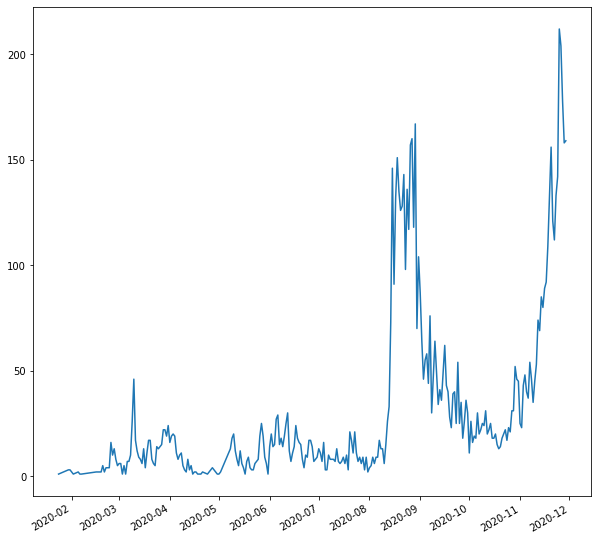

In [58]:
df['확진일자'].value_counts().plot(figsize=(10,10))

In [59]:
df['월일'] = df['확진일자'].astype(str).map(lambda x: x[-5:])

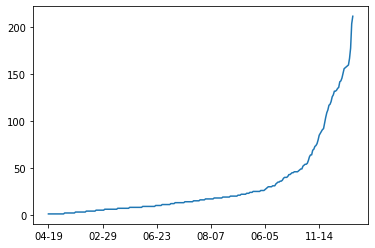

In [60]:
df['월일'].value_counts().sort_values().plot()

In [61]:
day_count = df['월일'].value_counts().sort_index()
day_count

01-24      1
01-30      3
01-31      3
02-02      1
02-05      2
        ... 
11-25    212
11-26    204
11-27    178
11-28    158
11-29    159
Name: 월일, Length: 282, dtype: int64

In [62]:
df['월일'].describe()

count      8811
unique      282
top       11-25
freq        212
Name: 월일, dtype: object

In [63]:
day_count.describe()

count    282.000000
mean      31.244681
std       41.298933
min        1.000000
25%        7.000000
50%       16.000000
75%       33.750000
max      212.000000
Name: 월일, dtype: float64

In [64]:
df[df['월일'] == '11-25']['거주지'].value_counts()

강서구     58
노원구     16
타시도     16
송파구     16
양천구     12
강남구     11
서초구      8
중랑구      7
성동구      7
성북구      7
구로구      5
동대문구     5
마포구      5
강북구      5
도봉구      5
동작구      5
강동구      5
은평구      4
용산구      4
영등포구     3
광진구      2
서대문구     2
금천구      1
기타       1
종로구      1
관악구      1
Name: 거주지, dtype: int64

In [65]:
import matplotlib.pyplot as plt

In [66]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

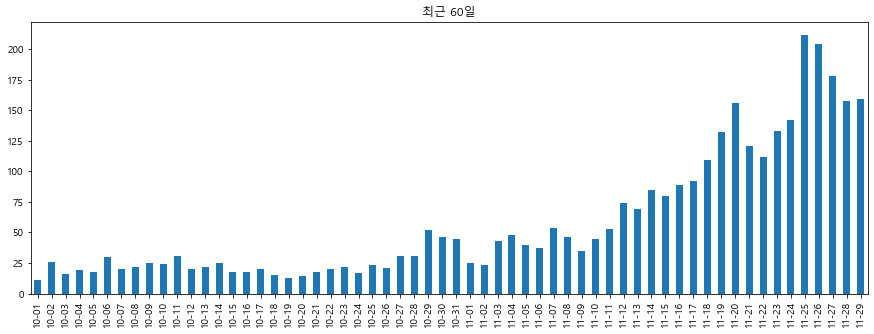

In [67]:
day_count[-60:].plot.bar(figsize=(15,5), title= '최근 60일')

In [68]:
df.head(1)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일
0,198811,33918,11.29.,노원구,-,감염경로 조사중,NaN,NaN,2020-11-29,11,48,11-29


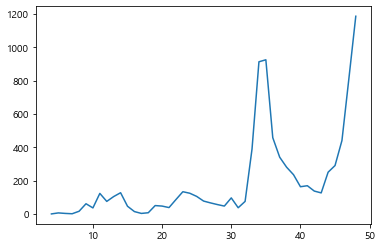

In [69]:
week_count = df['주'].value_counts().sort_index()
week_count.plot()

In [70]:
week_count_median = week_count.median()
week_count_mean = week_count.mean()
week_count_median, week_count_mean

(97.0, 195.8)

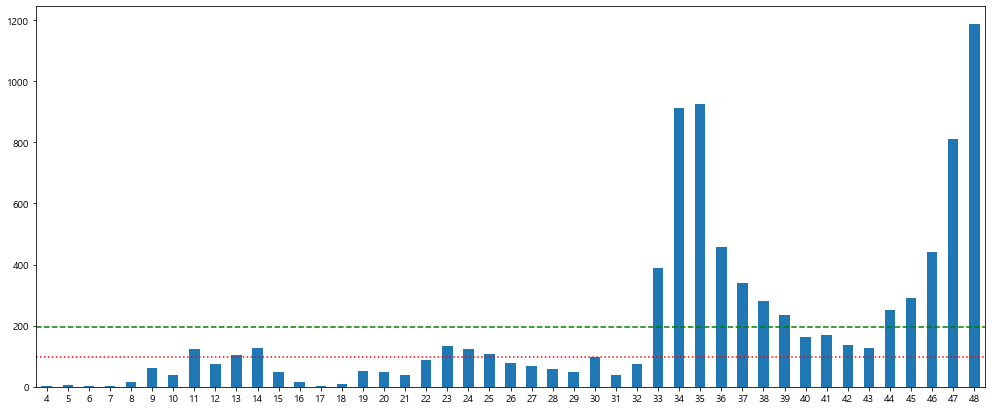

In [71]:
week_count.plot.bar(figsize=(17,7), rot=0)
plt.axhline(week_count_median, color='r', linestyle=':')
plt.axhline(week_count_mean, color='g', linestyle='--')

In [72]:
month_week_count = df.groupby(['월','주'])['연번'].count()

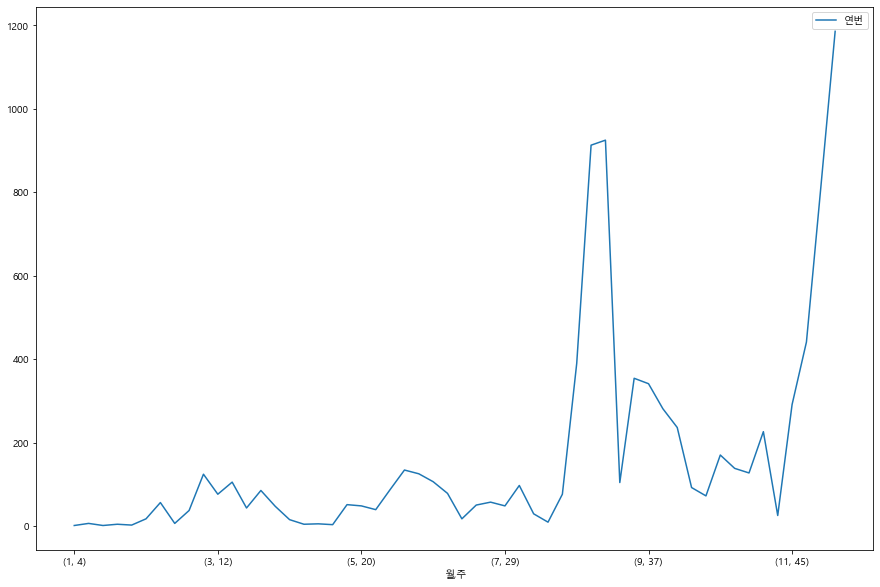

In [73]:
pd.DataFrame(month_week_count).plot(figsize=(15,10))

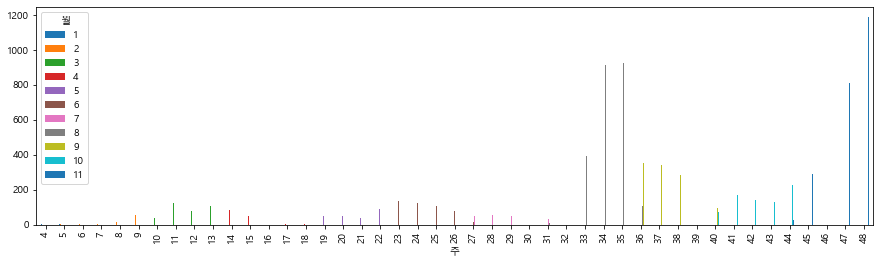

In [74]:
month_week_count.unstack().T.plot.bar(figsize=(15, 4))

In [75]:
day_count = df['확진일자'].value_counts().sort_index()

In [76]:
first_day = day_count.index[0]
last_day = day_count.index[-1]
first_day, last_day

(Timestamp('2020-01-24 00:00:00'), Timestamp('2020-11-29 00:00:00'))

In [77]:
days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-11-20', '2020-11-21', '2020-11-22', '2020-11-23',
               '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27',
               '2020-11-28', '2020-11-29'],
              dtype='datetime64[ns]', length=311, freq='D')

In [78]:
df_days = pd.DataFrame({"연월일": days})
df_days.head()

,연월일
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [79]:
day_count = df["확진일자"].value_counts().sort_index()
day_count.head()

2020-01-24    1
2020-01-30    3
2020-01-31    3
2020-02-02    1
2020-02-05    2
Name: 확진일자, dtype: int64

In [80]:
df_day_count = day_count.reset_index()

In [81]:
df_day_count.columns = ["확진일자", "확진수"]
df_day_count.head(3)

,확진일자,확진수
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3


In [82]:
df_all_days = df_days.merge(df_day_count, 
                            left_on="연월일", 
                            right_on="확진일자", 
                            how="left")
df_all_days = df_all_days[["연월일", "확진수"]]
df_all_days.head()

,연월일,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN


In [83]:
df_all_days["확진수"] = df_all_days["확진수"].fillna(0).astype(int)
df_all_days.head(3)

,연월일,확진수
0,2020-01-24,1
1,2020-01-25,0
2,2020-01-26,0


In [84]:
df_all_days["일자"] = df_all_days["연월일"].astype(str).map(lambda x : x[-5:])
df_all_days

,연월일,확진수,일자
0,2020-01-24,1,01-24
1,2020-01-25,0,01-25
2,2020-01-26,0,01-26
3,2020-01-27,0,01-27
4,2020-01-28,0,01-28
...,...,...,...
306,2020-11-25,212,11-25
307,2020-11-26,204,11-26
308,2020-11-27,178,11-27
309,2020-11-28,158,11-28


In [85]:
df_all_days["누적확진"] = df_all_days["확진수"].cumsum()
df_all_days[["확진수", "누적확진"]].head(10)

,확진수,누적확진
0,1,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,3,4
7,3,7
8,0,7
9,1,8


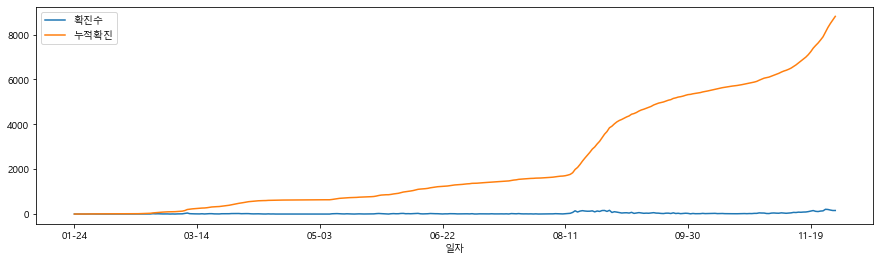

In [86]:
df_g = df_all_days[['일자','확진수','누적확진' ]]
df_g = df_g.set_index("일자")
df_g.plot(figsize=(15, 4))

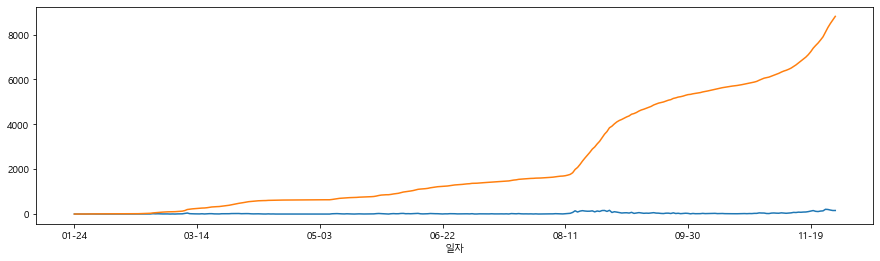

In [87]:
df_g["확진수"].plot()
df_g["누적확진"].plot(figsize=(15, 4))

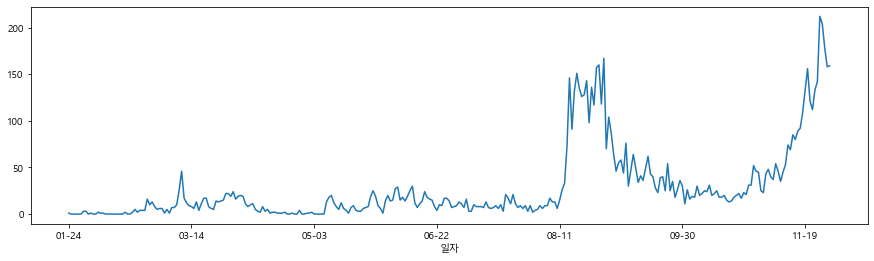

In [88]:
df_g["확진수"].plot(figsize=(15, 4))

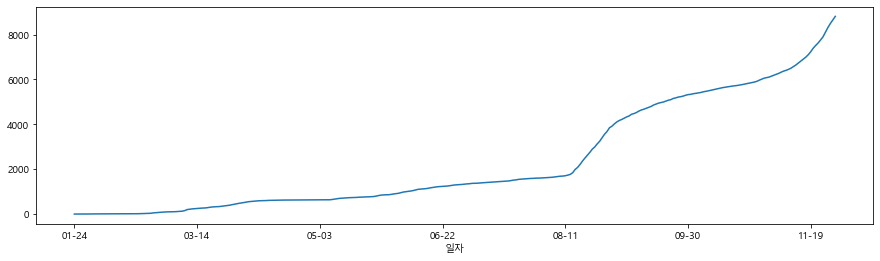

In [89]:
df_g["누적확진"].plot(figsize=(15, 4))

In [90]:
import numpy as np

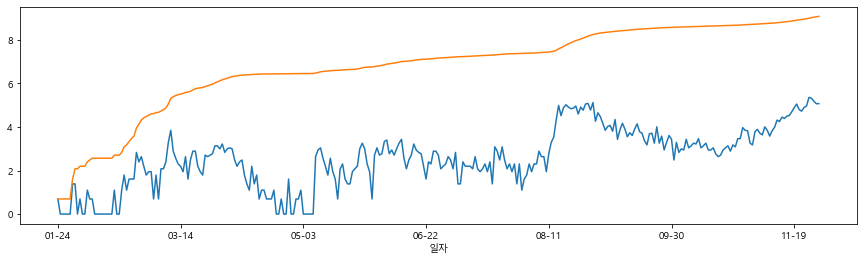

In [91]:
np.log(df_g["확진수"] + 1).plot()
np.log(df_g["누적확진"] + 1).plot(figsize=(15, 4))

In [92]:
df["요일"] = df["확진일자"].dt.dayofweek
df[["확진일자", "요일"]].head()

,확진일자,요일
0,2020-11-29,6
1,2020-11-29,6
2,2020-11-29,6
3,2020-11-29,6
4,2020-11-29,6


In [93]:
weekday_name = "월 화 수 목 금 토 일"
weekday_name = weekday_name.split()
weekday_name

['월', '화', '수', '목', '금', '토', '일']

In [94]:
df["요일명"] = df["요일"].map(lambda x :weekday_name[x])
df[["확진일자", "요일", "요일명"]].head()

,확진일자,요일,요일명
0,2020-11-29,6,일
1,2020-11-29,6,일
2,2020-11-29,6,일
3,2020-11-29,6,일
4,2020-11-29,6,일


In [95]:
g = df.groupby(["월", "요일명"])["연번"].count()
g.index

MultiIndex([( 1, '금'),
            ( 1, '목'),
            ( 2, '금'),
            ( 2, '목'),
            ( 2, '수'),
            ( 2, '월'),
            ( 2, '일'),
            ( 2, '토'),
            ( 2, '화'),
            ( 3, '금'),
            ( 3, '목'),
            ( 3, '수'),
            ( 3, '월'),
            ( 3, '일'),
            ( 3, '토'),
            ( 3, '화'),
            ( 4, '금'),
            ( 4, '목'),
            ( 4, '수'),
            ( 4, '월'),
            ( 4, '일'),
            ( 4, '토'),
            ( 4, '화'),
            ( 5, '금'),
            ( 5, '목'),
            ( 5, '수'),
            ( 5, '월'),
            ( 5, '일'),
            ( 5, '토'),
            ( 5, '화'),
            ( 6, '금'),
            ( 6, '목'),
            ( 6, '수'),
            ( 6, '월'),
            ( 6, '일'),
            ( 6, '토'),
            ( 6, '화'),
            ( 7, '금'),
            ( 7, '목'),
            ( 7, '수'),
            ( 7, '월'),
            ( 7, '일'),
            ( 7, '토'),
           

In [96]:
g = g.unstack()
g = g.fillna(0).astype(int)
g = g[weekday_name]
g

요일명,월,화,수,목,금,토,일
월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,289,327,328,336,473,277
9,177,242,228,207,169,155,126


In [97]:
g.style.background_gradient(cmap="Greens")

요일명,월,화,수,목,금,토,일
월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,289,327,328,336,473,277
9,177,242,228,207,169,155,126


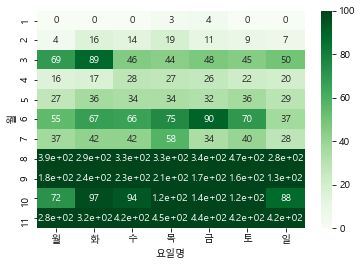

In [98]:
import seaborn as sns
sns.heatmap(g, cmap="Greens", annot=True, vmax=100)

In [99]:
gu_count = df["거주지"].value_counts()

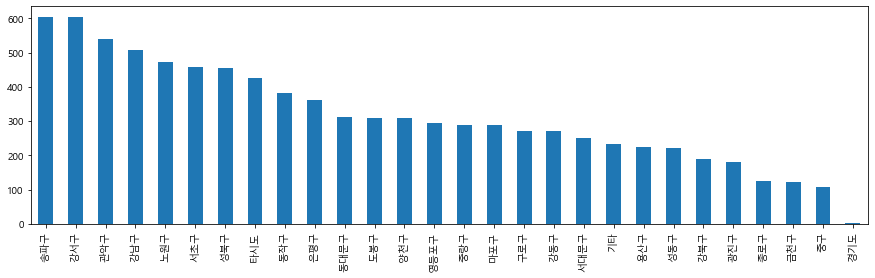

In [100]:
gu_count.plot.bar(figsize=(15, 4), rot=90)

In [101]:
seoul_gu = gu_count.head(25).index
seoul_gu

Index(['송파구', '강서구', '관악구', '강남구', '노원구', '서초구', '성북구', '타시도', '동작구', '은평구',
       '동대문구', '도봉구', '양천구', '영등포구', '중랑구', '마포구', '구로구', '강동구', '서대문구', '기타',
       '용산구', '성동구', '강북구', '광진구', '종로구'],
      dtype='object')

In [102]:
df[~df["거주지"].isin(seoul_gu)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일,요일,요일명
86,198725,33853,11.29.,금천구,-,감염경로 조사중,NaN,NaN,2020-11-29,11,48,11-29,6,일
110,198701,34200,11.29.,금천구,-,강서구 소재 병원관련(11월),NaN,NaN,2020-11-29,11,48,11-29,6,일
111,198700,33928,11.29.,금천구,-,기타 확진자 접촉,NaN,NaN,2020-11-29,11,48,11-29,6,일
112,198699,33929,11.29.,금천구,-,기타 확진자 접촉,NaN,NaN,2020-11-29,11,48,11-29,6,일
118,198693,33905,11.29.,금천구,-,강서구 댄스교습관련 시설,NaN,NaN,2020-11-29,11,48,11-29,6,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8585,19226,7925,3.12.,금천구,-,콜센터직원 접촉,퇴원,NaN,2020-03-12,3,11,03-12,3,목
8624,19187,7637,3.10.,금천구,-,구로구 콜센터 관련,퇴원,NaN,2020-03-10,3,11,03-10,1,화
8674,19137,7463,3.9.,금천구,-,구로구 콜센터 관련,퇴원,NaN,2020-03-09,3,11,03-09,0,월
8675,19136,7461,3.9.,중구,-,구로구 콜센터 관련,퇴원,NaN,2020-03-09,3,11,03-09,0,월


In [103]:
df["지역"] = df["거주지"]
df.head(1)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일,요일,요일명,지역
0,198811,33918,11.29.,노원구,-,감염경로 조사중,NaN,NaN,2020-11-29,11,48,11-29,6,일,노원구


In [104]:
df.loc[~df["거주지"].isin(seoul_gu), "지역"] = "타지역"

In [105]:
df["지역"] = df["거주지"].map(lambda x : x if x in seoul_gu else "타지역")
df.tail(1)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일,요일,요일명,지역
8810,191,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원,NaN,2020-01-24,1,4,01-24,4,금,강서구


In [106]:
def find_seoul_gu(x):
    if x in seoul_gu:
        return x
    else:
        return "타지역"

In [107]:
df["지역"] = df["거주지"].apply(find_seoul_gu)

In [108]:
df["지역"] = df["거주지"].map(find_seoul_gu)

In [109]:
df.loc[df["지역"] == "타지역", "거주지"].unique()

array(['금천구', '중구', '경기도'], dtype=object)

In [110]:
seoul_gu_count = df["지역"].value_counts()

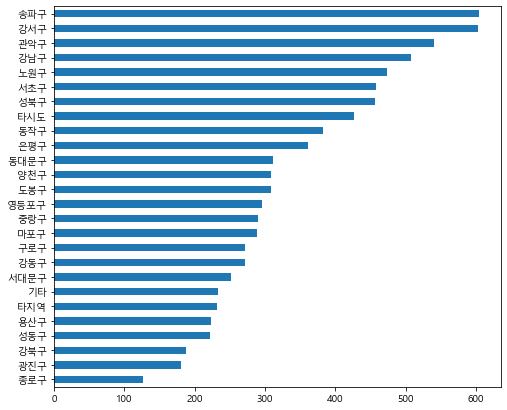

In [111]:
seoul_gu_count.sort_values().plot.barh(figsize=(8, 7))

In [112]:
df["접촉력"].value_counts().head(10)

기타 확진자 접촉        1536
감염경로 조사중          903
성북구 사랑제일교회 관련     641
확인 중              586
해외 접촉 추정          404
타시도 확진자 접촉        378
강서구 댄스교습관련 시설     159
이태원 클럽 관련         139
8.15서울도심집회        126
리치웨이 관련           119
Name: 접촉력, dtype: int64

In [113]:
df["접촉력"].value_counts(normalize=True).head(10) * 100

기타 확진자 접촉        17.432755
감염경로 조사중         10.248553
성북구 사랑제일교회 관련     7.274997
확인 중              6.650777
해외 접촉 추정          4.585178
타시도 확진자 접촉        4.290092
강서구 댄스교습관련 시설     1.804562
이태원 클럽 관련         1.577573
8.15서울도심집회        1.430031
리치웨이 관련           1.350584
Name: 접촉력, dtype: float64

In [114]:
df["접촉력"].unique()

array(['감염경로 조사중', '기타 확진자 접촉', '구로구 고등학교 관련', '강서구 댄스교습관련 시설',
       '강남구 콜센터 관련', '강서구 소재 병원Ⅲ 관련', '중구 소재 판매시설 관련', '노원구 체육시설 관련',
       '타시도 확진자 접촉', '성동구 소재 PC방 관련', '수도권산악회(11월) 관련 ', '서초구 사우나Ⅱ 관련',
       '강서구 경로당 관련', '마포구 홈쇼핑회사 관련', '해외 유입', '중구 성00 관련',
       '중랑구 실내 체육시설 Ⅱ 관련', '서초구 사우나 관련', '성동구 체육시설 관련',
       '강서구 소재 병원관련(11월)', '동대문구 체육시설 관련', '어플소모임 관련', '강남구 연기학원 관련',
       '도봉구 청련사 관련', '동작구 임용단기고시 관련', '서초구 건설회사 관련', '소규모 지인모임',
       '마포구 홍대새교회 관련', '강서구 가족 관련', '동창 운동 모임 관련', '노원구 가족관련', '노원구청 관련',
       '중구 제조업공장 관련', '연세대 학생 관련', '서대문구 요양시설 관련', '송파구 사우나 관련',
       '마포구 소재 노인복지시설 관련', '강남구 음식점Ⅱ 관련', '삼성서울병원 관련', '지인-가족전파',
       '중구 소재 보람상조회사 관련', '용산구 국군복지단 관련', '중구 소재 상조회사 관련', '어플 소모임 관련',
       '동작구 모조카페 관련', '마포구 홍대세교회관련', '수도권 지인모임(11월) 관련', '중구 교회 관련',
       '중랑구 실내체육시설 관련', '마포구 홍대세교회 관련', '동대문구 고등학교(마포구 홍대 새교회관련)',
       '감염경로 조사 중', '노원구 의료기관 관련', '강남구 헬스장 관련', '성북구 가족 관련',
       '송파구 잠언의료기(강남구CJ텔레닉스)', '동작구 임용단기학원 관련', '수도권산악회(11월) 관련',
   

In [115]:
df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [116]:
df.loc[df["접촉력"].str.contains("확인"), "접촉력"] = "확인 중"

In [117]:
df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중'], dtype=object)

In [118]:
contact_count = df["접촉력"].value_counts()
contact_count

기타 확진자 접촉        1536
감염경로 조사중          903
성북구 사랑제일교회 관련     641
확인 중              628
해외 접촉 추정          404
                 ... 
종로구 서울대병원           1
#9621 접촉            1
강동구 확진자 접촉          1
도봉구 확진자 접촉          1
한양대병원               1
Name: 접촉력, Length: 411, dtype: int64

In [119]:
df["접촉력"].value_counts(normalize=True).head(15) * 100 

기타 확진자 접촉            17.432755
감염경로 조사중             10.248553
성북구 사랑제일교회 관련         7.274997
확인 중                  7.127454
해외 접촉 추정              4.585178
타시도 확진자 접촉            4.290092
강서구 댄스교습관련 시설         1.804562
이태원 클럽 관련             1.577573
8.15서울도심집회            1.430031
리치웨이 관련               1.350584
해외 유입                 1.271138
동대문구 에이스희망케어센터 관련     0.805811
서초구 사우나 관련            0.771763
도봉구 다나병원              0.771763
강남구 헬스장 관련            0.749064
Name: 접촉력, dtype: float64

In [120]:
contact_count.head(15)

기타 확진자 접촉            1536
감염경로 조사중              903
성북구 사랑제일교회 관련         641
확인 중                  628
해외 접촉 추정              404
타시도 확진자 접촉            378
강서구 댄스교습관련 시설         159
이태원 클럽 관련             139
8.15서울도심집회            126
리치웨이 관련               119
해외 유입                 112
동대문구 에이스희망케어센터 관련      71
서초구 사우나 관련             68
도봉구 다나병원               68
강남구 헬스장 관련             66
Name: 접촉력, dtype: int64

In [121]:
top_contact = contact_count.head(15).index
top_contact

Index(['기타 확진자 접촉', '감염경로 조사중', '성북구 사랑제일교회 관련', '확인 중', '해외 접촉 추정',
       '타시도 확진자 접촉', '강서구 댄스교습관련 시설', '이태원 클럽 관련', '8.15서울도심집회', '리치웨이 관련',
       '해외 유입', '동대문구 에이스희망케어센터 관련', '서초구 사우나 관련', '도봉구 다나병원', '강남구 헬스장 관련'],
      dtype='object')

In [122]:
df_top_contact = df[df["접촉력"].isin(top_contact)]

In [123]:
contact_group = df_top_contact.groupby(["접촉력", "월"])["연번"].count().unstack()
contact_group = contact_group.fillna(0).astype(int)
contact_group = contact_group.sort_values(by=[5, 6, 3, 4, 7, 3], ascending=False)
contact_group.style.background_gradient()

월,2,3,4,5,6,7,8,9,10,11
접촉력,,,,,,,,,,
이태원 클럽 관련,0,0,0,133,6,0,0,0,0,0
해외 접촉 추정,1,121,112,24,23,39,47,23,14,0
확인 중,10,28,9,12,75,49,444,1,0,0
타시도 확진자 접촉,5,17,4,2,6,16,92,76,34,126
리치웨이 관련,0,0,0,0,119,0,0,0,0,0
기타 확진자 접촉,0,0,0,0,0,1,422,309,116,688
8.15서울도심집회,0,0,0,0,0,0,113,13,0,0
감염경로 조사중,0,0,0,0,0,0,11,284,125,483
강남구 헬스장 관련,0,0,0,0,0,0,0,0,18,48


In [124]:
contact_group.loc[['해외 접촉 추정', '확인 중']]

월,2,3,4,5,6,7,8,9,10,11
접촉력,,,,,,,,,,
해외 접촉 추정,1,121,112,24,23,39,47,23,14,0
확인 중,10,28,9,12,75,49,444,1,0,0


In [125]:
df_unknown = df[df["접촉력"] == "확인 중"].copy()
df_unknown.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일,요일,요일명,지역
4853,193958,20163,8.31.,양천구,-,확인 중,퇴원,NaN,2020-08-31,8,36,08-31,0,월,양천구
4854,193957,20141,8.31.,은평구,-,확인 중,퇴원,NaN,2020-08-31,8,36,08-31,0,월,은평구
4855,193956,20159,8.31.,용산구,-,확인 중,퇴원,NaN,2020-08-31,8,36,08-31,0,월,용산구
4859,193952,20130,8.31.,도봉구,-,확인 중,퇴원,NaN,2020-08-31,8,36,08-31,0,월,도봉구
4865,193946,20039,8.31.,타시도,-,확인 중,퇴원,NaN,2020-08-31,8,36,08-31,0,월,타시도


In [126]:
df_unknown.shape

(628, 15)

In [127]:
all_weekly_case = df["주"].value_counts()
all_weekly_case.head()

48    1186
35     925
34     913
47     811
36     458
Name: 주, dtype: int64

In [128]:
unknown_weekly_case = df_unknown["주"].value_counts()
unknown_weekly_case.head()

35    224
34    170
24     25
33     25
23     18
Name: 주, dtype: int64

In [129]:
all_unknown = pd.DataFrame({"주별 확진" : all_weekly_case, 
                            "감염경로 불명 확진": unknown_weekly_case})
all_unknown = all_unknown.fillna(0)

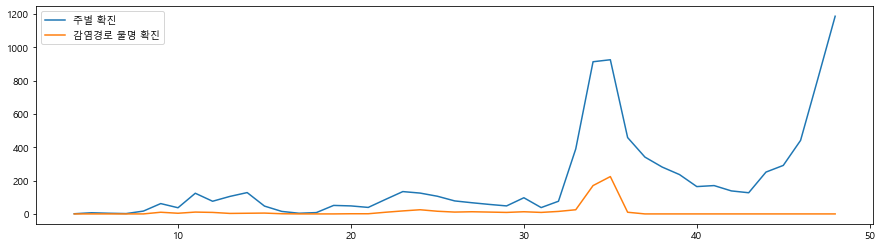

In [130]:
all_unknown.plot(figsize=(15, 4))

In [131]:
all_unknown["확인중 비율"] = (all_unknown["감염경로 불명 확진"] / all_unknown["주별 확진"]) * 100
all_unknown.sort_values(by="확인중 비율", ascending=False).head(10)

,주별 확진,감염경로 불명 확진,확인중 비율
35,925,224.0,24.216216
31,38,9.0,23.684211
24,125,25.0,20.000000
32,76,15.0,19.736842
27,67,13.0,19.402985
28,57,11.0,19.298246
29,48,9.0,18.750000
34,913,170.0,18.619934
9,62,10.0,16.129032
25,106,16.0,15.094340


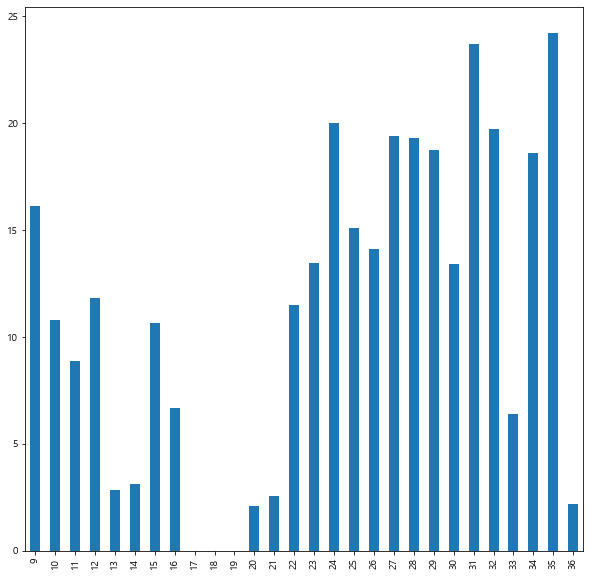

In [132]:
all_unknown['확인중 비율'][5:33].plot.bar(figsize=(10,10))

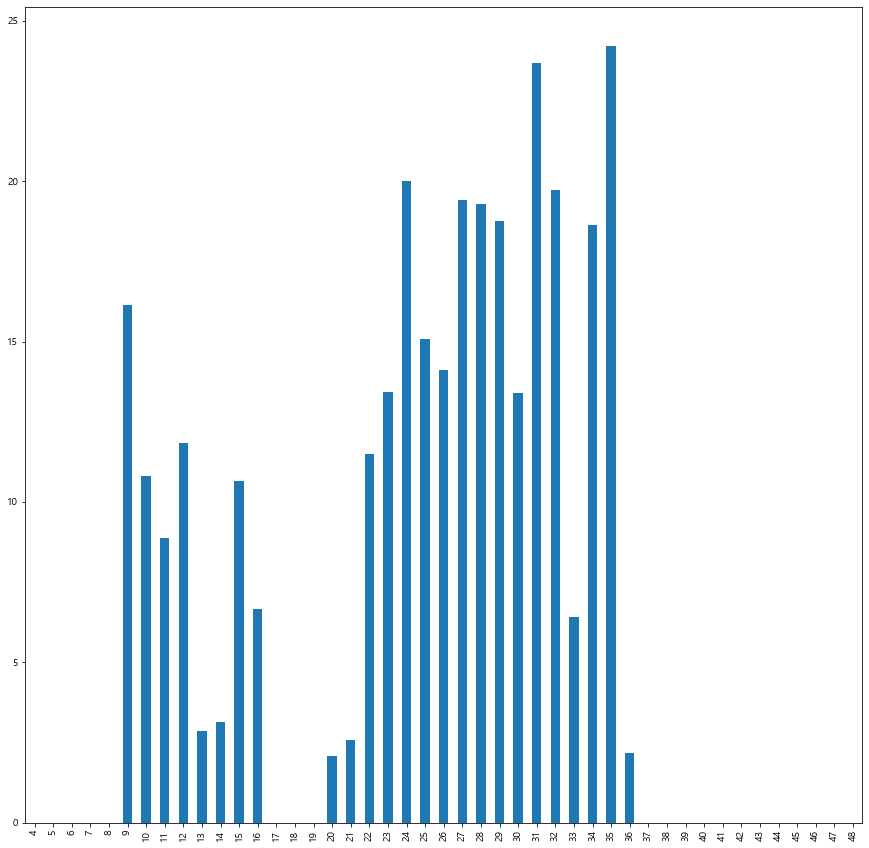

In [133]:
all_unknown['확인중 비율'].plot.bar(figsize=(15,15))

In [139]:
w = pd.DataFrame(df)
w.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일,요일,요일명,지역
0,198811,33918,11.29.,노원구,-,감염경로 조사중,NaN,NaN,2020-11-29,11,48,11-29,6,일,노원구
1,198810,34016,11.29.,타시도,-,감염경로 조사중,NaN,NaN,2020-11-29,11,48,11-29,6,일,타시도
2,198809,33902,11.29.,관악구,-,감염경로 조사중,NaN,NaN,2020-11-29,11,48,11-29,6,일,관악구
3,198808,34193,11.29.,관악구,-,기타 확진자 접촉,NaN,NaN,2020-11-29,11,48,11-29,6,일,관악구
4,198807,34180,11.29.,강동구,-,감염경로 조사중,NaN,NaN,2020-11-29,11,48,11-29,6,일,강동구
